In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [42]:
path = 'G:/My Drive/Systems engineering Studies/Final project/files submissions/Final Report/Reuslts/last run/Results data'
os.chdir(path)
os.listdir(path)

['results.xlsx', 'Copy of results.xlsx', 'desktop.ini']

In [43]:
fine_tune_results = pd.read_excel('Copy of results.xlsx',sheet_name='reward fine tunning' )
envConfig =  pd.read_excel('Copy of results.xlsx',sheet_name='envConfig' )
lastRun = pd.read_excel('Copy of results.xlsx',sheet_name='LastRun' )

In [44]:
fine_tune_results

,Run Name,Mean total reward,STD total reward,Mean Power Delta,Charge power variance,Number cases 'not enough energy',Number cases SOC smaller than ENonD,Mean soc deviation
0,first_run,1.949707e+03,2.625837e+02,411.046462,33963.003331,52,0,0.275132
1,second_run,3.238227e+04,4.566297e+02,390.690756,41504.158325,53,2,0.280423
2,third_run,-2.335812e+02,1.436842e+02,-129.473375,1855.104221,40,1,0.211640
3,fourth _run,-1.125421e+02,4.913611e+01,-23.813049,2808.313481,32,0,0.169312
4,Fifth _run,-1.560269e+05,1.298781e+05,-492.233158,4569.294881,19,0,0.100529
5,sixth_run,-4.394779e+06,3.269702e+06,-545.408429,1420.763825,22,0,0.116402
6,seventh_run,-2.359106e+04,8.031887e+03,-649.134244,15932.559710,20,0,0.105820
7,eight_run,-8.611336e+03,6.181158e+03,-289.625005,1388.508589,21,0,0.111111
8,ninth_run,-2.273241e+04,1.769544e+04,-373.681527,2977.780698,18,1,0.095238
9,tenth_run,-4.276024e+00,1.019331e+00,47.089669,9678.806912,31,0,0.164021


In [45]:
fine_tune_results.columns

Index(['Run Name', 'Mean total reward', 'STD total reward', 'Mean Power Delta',
       'Charge power variance', 'Number cases 'not enough energy'',
       'Number cases SOC smaller than ENonD', 'Mean soc deviation'],
      dtype='object')

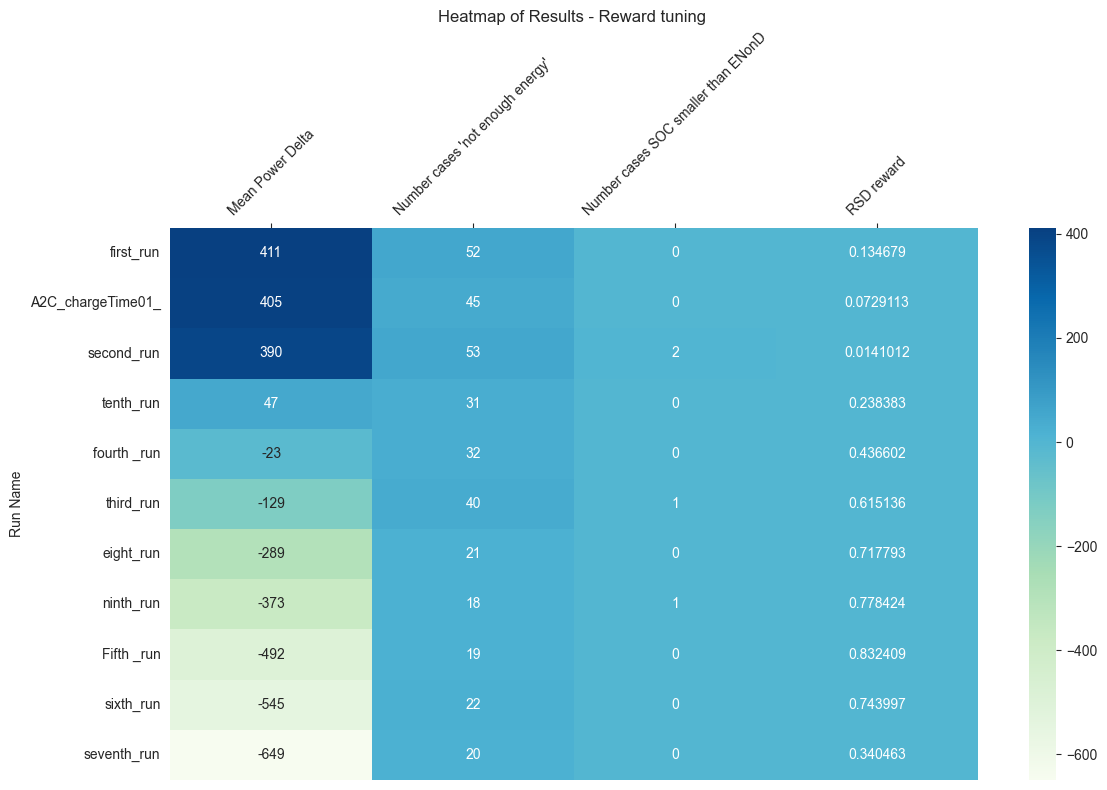

In [46]:
fine_tune_results['RSD reward'] = np.abs(fine_tune_results['STD total reward']/ fine_tune_results['Mean total reward'])
fine_tune_results_sorted = fine_tune_results.sort_values(by=['Mean Power Delta', "Number cases 'not enough energy'"], ascending=[False, False])
fine_tune_results_sorted = fine_tune_results_sorted[['Run Name', 'Mean Power Delta',
        "Number cases 'not enough energy'",
       'Number cases SOC smaller than ENonD', 'RSD reward']]
df_heatmap = fine_tune_results_sorted.set_index('Run Name')
df_heatmap = df_heatmap.select_dtypes(include=[float, int])
df_heatmap["Mean Power Delta"] = df_heatmap["Mean Power Delta"].astype(int)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(df_heatmap, cmap="GnBu", annot=True, fmt='g')
ax.xaxis.set_tick_params(rotation=45)  # Rotate x-axis labels
ax.xaxis.tick_top()
plt.title("Heatmap of Results - Reward tuning ")
plt.tight_layout()
plt.show()



In [47]:
fine_tune_results['RSD reward'] = np.abs(fine_tune_results['STD total reward']/ fine_tune_results['Mean total reward'])


In [48]:
fine_tune_results_sorted = fine_tune_results.sort_values(by=['Mean Power Delta', "Number cases 'not enough energy'"], ascending=[False, False])


In [49]:
fine_tune_results_sorted = fine_tune_results_sorted[['Run Name', 'Mean Power Delta',
        "Number cases 'not enough energy'",
       'Number cases SOC smaller than ENonD', 'RSD reward']]
fine_tune_results_sorted

,Run Name,Mean Power Delta,Number cases 'not enough energy',Number cases SOC smaller than ENonD,RSD reward
0,first_run,411.046462,52,0,0.134679
10,A2C_chargeTime01_,405.501897,45,0,0.072911
1,second_run,390.690756,53,2,0.014101
9,tenth_run,47.089669,31,0,0.238383
3,fourth _run,-23.813049,32,0,0.436602
2,third_run,-129.473375,40,1,0.615136
7,eight_run,-289.625005,21,0,0.717793
8,ninth_run,-373.681527,18,1,0.778424
4,Fifth _run,-492.233158,19,0,0.832409
5,sixth_run,-545.408429,22,0,0.743997


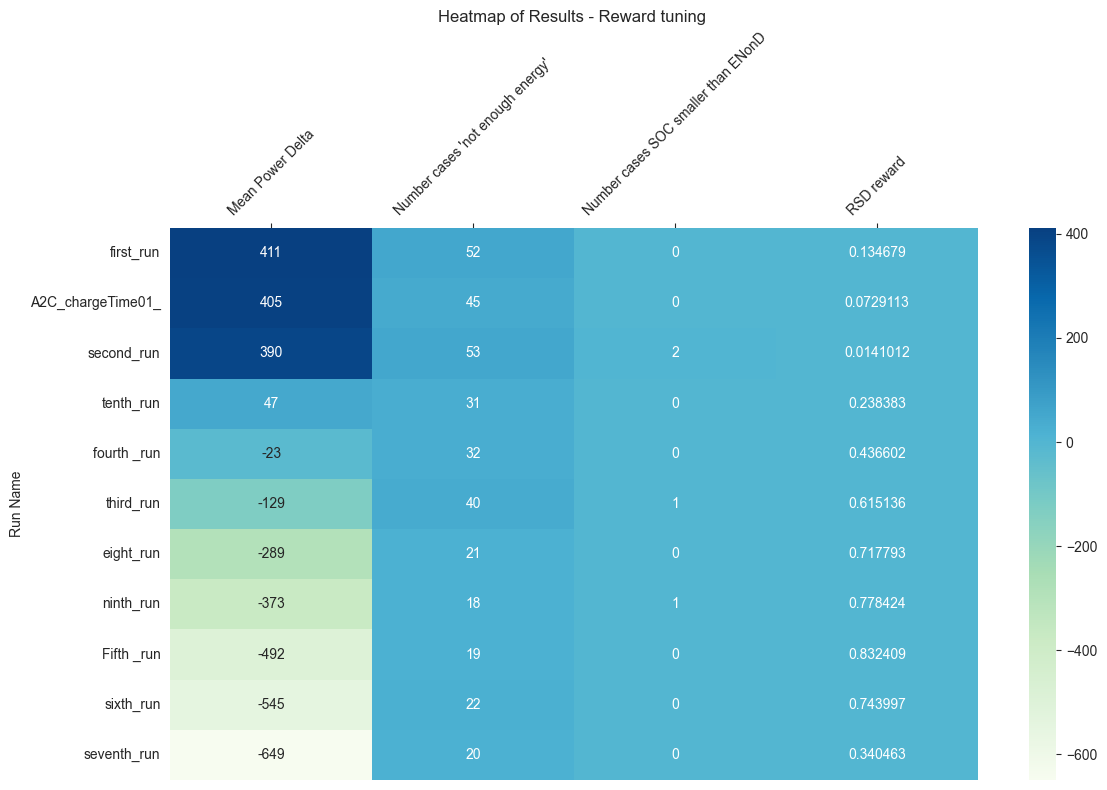

In [50]:
df_heatmap = fine_tune_results_sorted.set_index('Run Name')
df_heatmap = df_heatmap.select_dtypes(include=[float, int])
df_heatmap["Mean Power Delta"] = df_heatmap["Mean Power Delta"].astype(int)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(df_heatmap, cmap="GnBu", annot=True, fmt='g')
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.tick_top()
plt.title("Heatmap of Results - Reward tuning ")
plt.tight_layout()
plt.show()



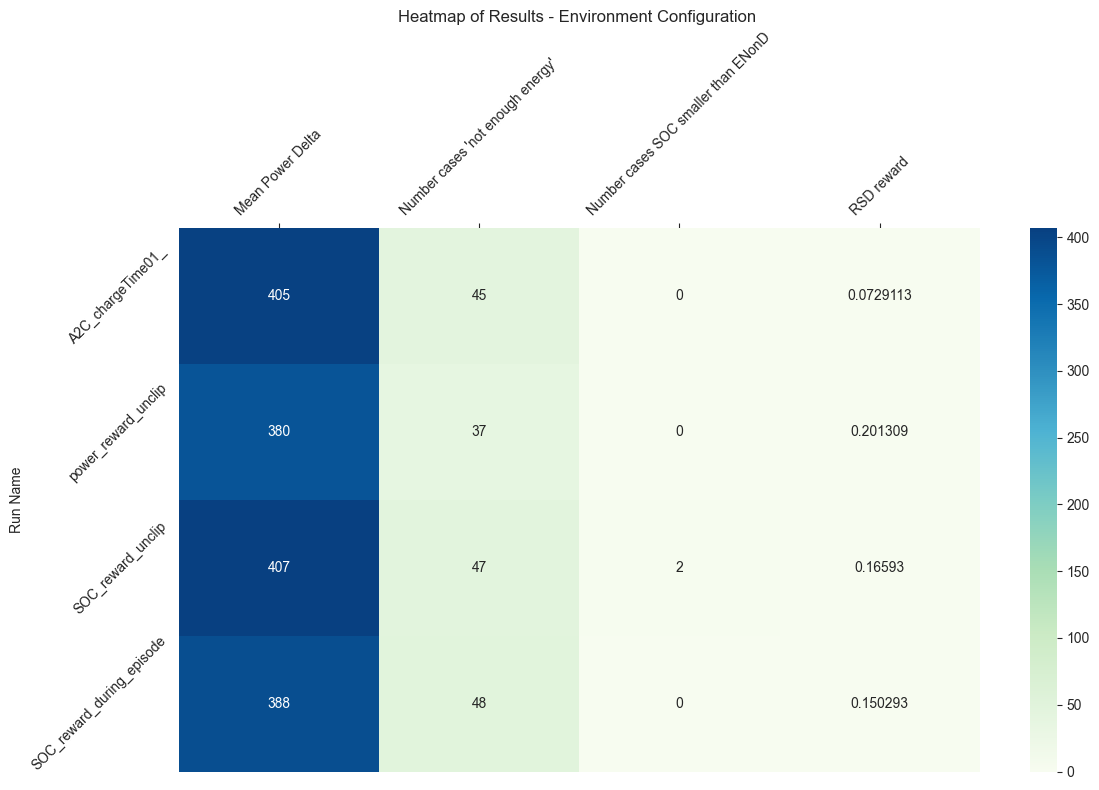

In [51]:
envConfig
envConfig['RSD reward'] = np.abs(envConfig['STD total reward']/ envConfig['Mean total reward'])
envConfig_sorted = envConfig.sort_values(by=['Mean Power Delta', "Number cases 'not enough energy'"], ascending=[False, False])
envConfig_sorted = envConfig[['Run Name', 'Mean Power Delta',
        "Number cases 'not enough energy'",
       'Number cases SOC smaller than ENonD', 'RSD reward']]
df_heatmap = envConfig_sorted.set_index('Run Name')
df_heatmap = df_heatmap.select_dtypes(include=[float, int])
df_heatmap["Mean Power Delta"] = df_heatmap["Mean Power Delta"].astype(int)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(df_heatmap, cmap="GnBu", annot=True, fmt='g')
ax.xaxis.set_tick_params(rotation=45)
ax.yaxis.set_tick_params(rotation=45)
ax.xaxis.tick_top()
plt.title("Heatmap of Results - Environment Configuration ")
plt.tight_layout()
plt.show()



C:\Users\dtubiana\AppData\Local\Temp\ipykernel_26024\2904428207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lastRun100['RSD reward'] = np.abs(lastRun100['STD total reward']/ lastRun100['Mean total reward'])


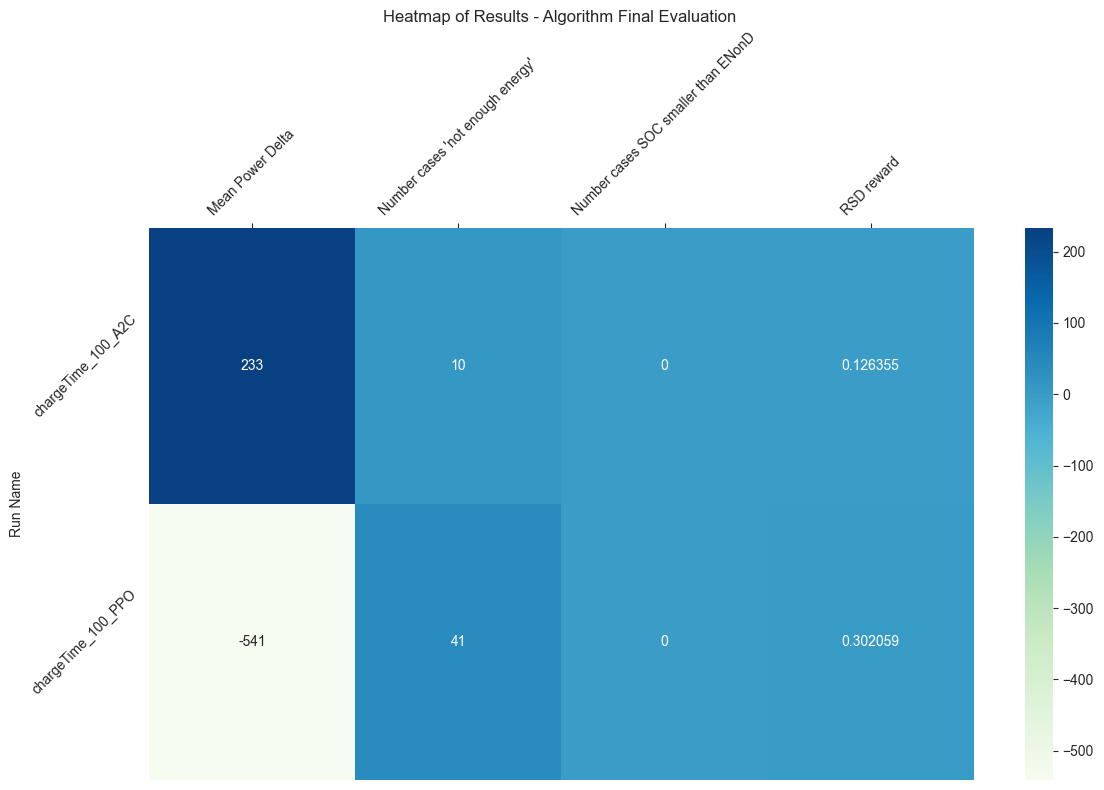

In [52]:
lastRun100 = lastRun[lastRun['Run Name'].str.contains('100')]
lastRun100['RSD reward'] = np.abs(lastRun100['STD total reward']/ lastRun100['Mean total reward'])
lastRun_sorted100 = lastRun100.sort_values(by=['Mean Power Delta', "Number cases 'not enough energy'"], ascending=[False, False])
lastRun_sorted100 = lastRun100[['Run Name', 'Mean Power Delta',
        "Number cases 'not enough energy'",
       'Number cases SOC smaller than ENonD', 'RSD reward']]
df_heatmap = lastRun_sorted100.set_index('Run Name')
df_heatmap = df_heatmap.select_dtypes(include=[float, int])
df_heatmap["Mean Power Delta"] = df_heatmap["Mean Power Delta"].astype(int)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(df_heatmap, cmap="GnBu", annot=True, fmt='g')
ax.xaxis.set_tick_params(rotation=45)
ax.yaxis.set_tick_params(rotation=45)
ax.xaxis.tick_top()
plt.title("Heatmap of Results - Algorithm Final Evaluation ")
plt.tight_layout()
plt.show()



C:\Users\dtubiana\AppData\Local\Temp\ipykernel_26024\3259307294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lastRun78['RSD reward'] = np.abs(lastRun78['STD total reward']/ lastRun78['Mean total reward'])


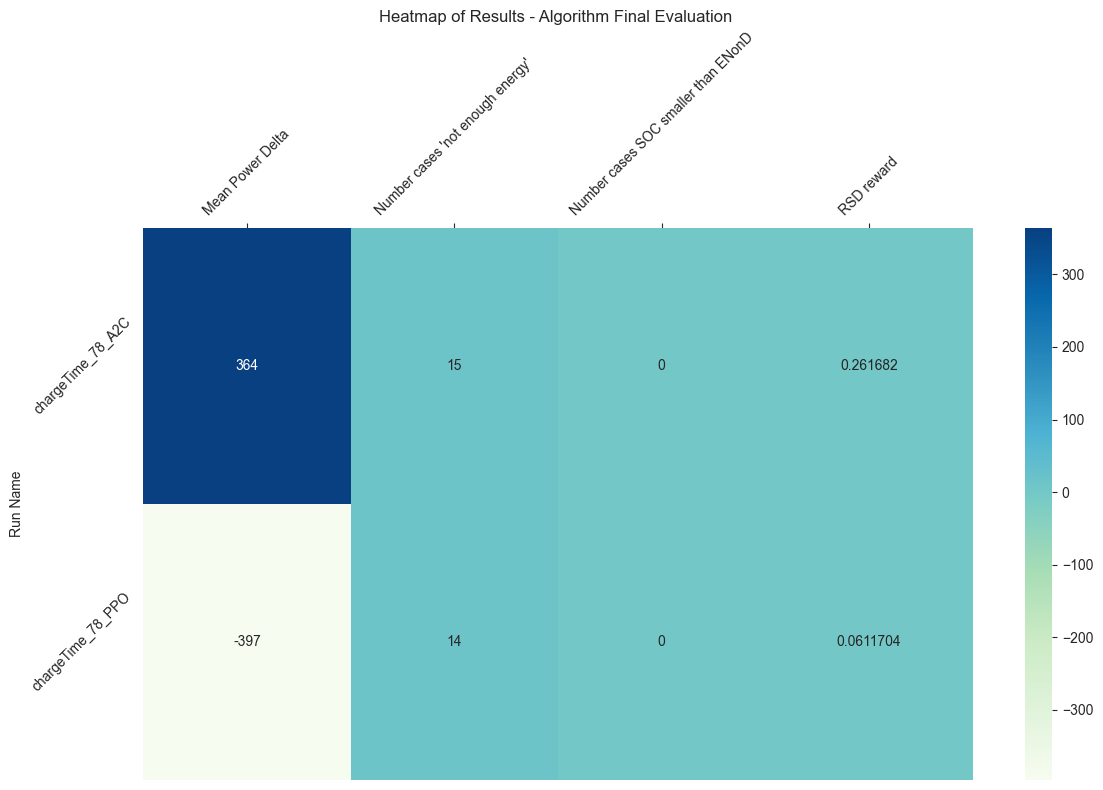

In [53]:
lastRun78 = lastRun[lastRun['Run Name'].str.contains('78')]
lastRun78['RSD reward'] = np.abs(lastRun78['STD total reward']/ lastRun78['Mean total reward'])
lastRun_sorted78 = lastRun78.sort_values(by=['Mean Power Delta', "Number cases 'not enough energy'"], ascending=[False, False])
lastRun_sorted78 = lastRun78[['Run Name', 'Mean Power Delta',
        "Number cases 'not enough energy'",
       'Number cases SOC smaller than ENonD', 'RSD reward']]
df_heatmap = lastRun_sorted78.set_index('Run Name')
df_heatmap = df_heatmap.select_dtypes(include=[float, int])
df_heatmap["Mean Power Delta"] = df_heatmap["Mean Power Delta"].astype(int)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(df_heatmap, cmap="GnBu", annot=True, fmt='g')
ax.xaxis.set_tick_params(rotation=45)
ax.yaxis.set_tick_params(rotation=45)
ax.xaxis.tick_top()
plt.title("Heatmap of Results - Algorithm Final Evaluation ")
plt.tight_layout()
plt.show()

